In [154]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [203]:
image = cv2.imread('img/img1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [204]:
height, width, _ = image.shape
print(f"Height: {height}\nWidth: {width}")

Height: 1701
Width: 1200


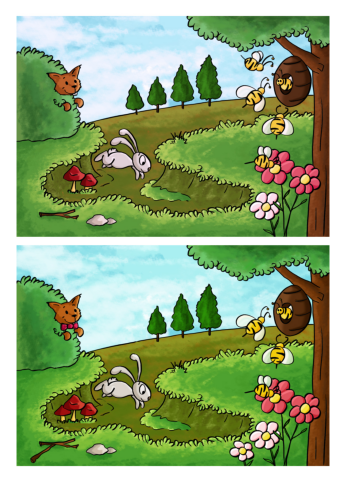

In [205]:
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [206]:
mid_height = height//2
img1 = image[:mid_height, :]
img2 = image[mid_height:, :]

In [159]:
img1.shape

(850, 1200, 3)

In [160]:
img2.shape

(851, 1200, 3)

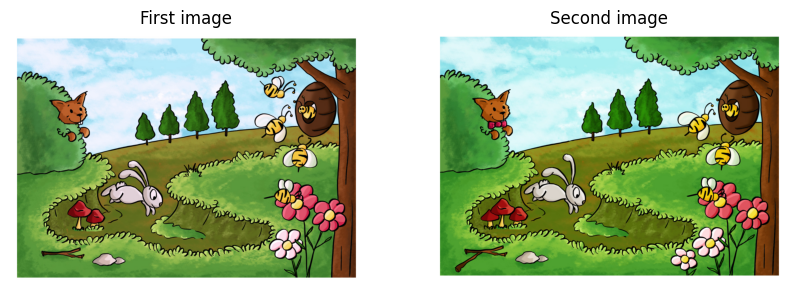

In [161]:
plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Second image')
plt.axis('off')

plt.show()

In [207]:
height1, width1, _ = img1.shape
height2, width2, _ = img2.shape

In [208]:
if height1 > height2:
    img1 = img1[:height2, :]
elif height2 > height1:
    img2 = img2[:height1, :]

In [164]:
img1.shape

(850, 1200, 3)

In [165]:
img2.shape

(850, 1200, 3)

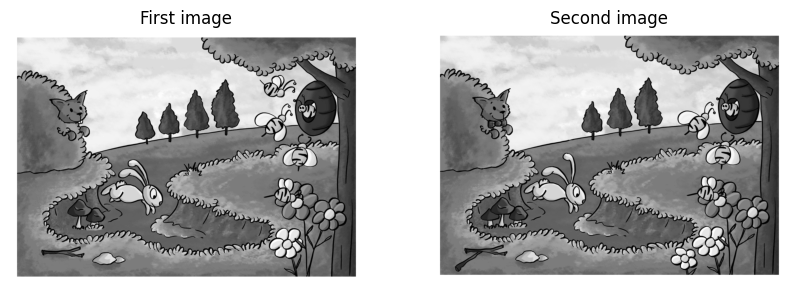

In [209]:
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Second image')
plt.axis('off')

plt.show()

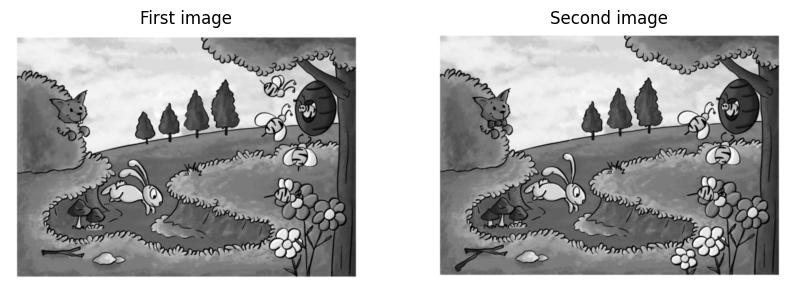

In [210]:
img1 = cv2.GaussianBlur(img1, (5, 5), 0)
img2 = cv2.GaussianBlur(img2, (5, 5), 0)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Second image')
plt.axis('off')

plt.show()

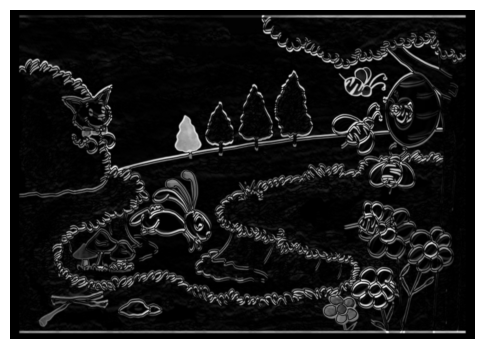

In [211]:
diff = cv2.absdiff(img1, img2)

plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

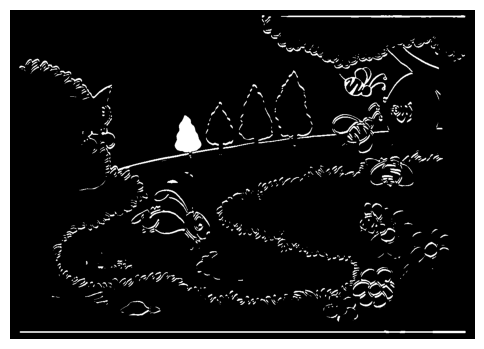

In [221]:
_, thresh = cv2.threshold(diff, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [187]:
kernel = np.ones((2, 2), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=2)

In [222]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

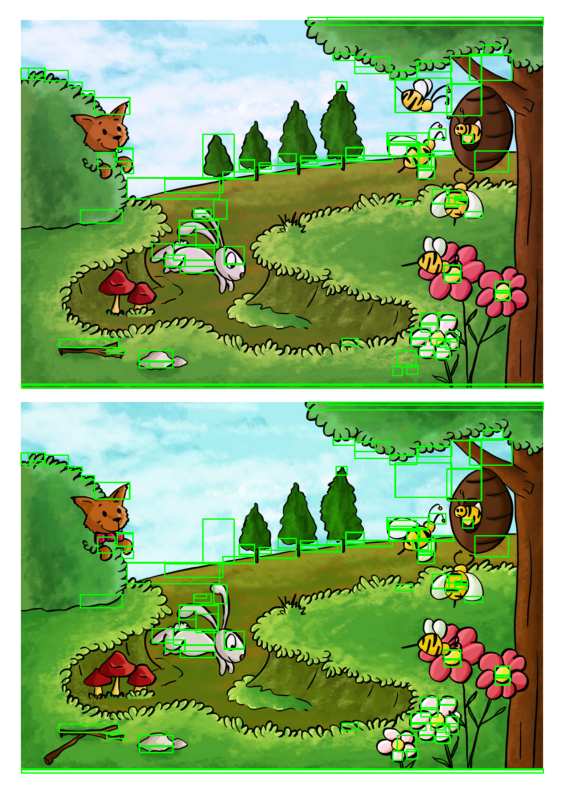

In [223]:
for contour in contours:
    if cv2.contourArea(contour) > 500:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image, (x, y + height//2), (x + w, y + height//2 + h), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()